In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [3]:
train = pd.read_csv('../input/janata-hack-machine-learning-for-banking/train_fNxu4vz.csv',thousands=',')
test = pd.read_csv('../input/janata-hack-machine-learning-for-banking/test_fjtUOL8.csv',thousands=',')

In [4]:
print(train.shape)
train.head()

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.000000,not verified,car,18.370000,0,nan,9,14,Female,1
1,10000002,30000,4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.930000,0,17.000000,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.880000,0,nan,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.340000,3,nan,16,22,Male,3
4,10000005,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.170000,1,nan,19,30,Female,1


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested        int64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [7]:
category = []
for col in train.columns:
    if train[col].dtypes == 'object':
        category.append(col)
category

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [8]:
train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

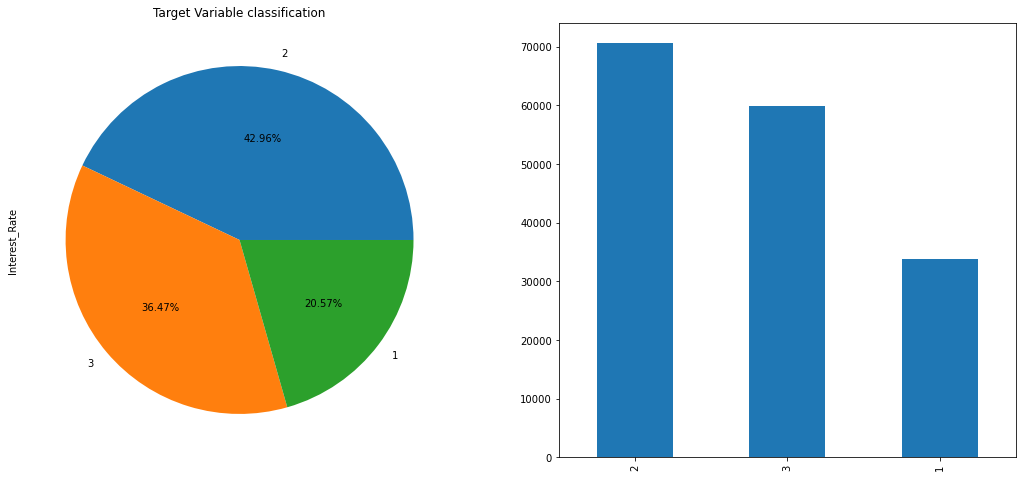

In [9]:
#f,ax = plt.subplots(1,2,figsize = (18,8))
plt.subplot(121)
train['Interest_Rate'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (18,8),title = 'Target Variable classification')
plt.subplot(122)
train['Interest_Rate'].value_counts().plot.bar(figsize = (18,8))

categorical variables:
    Nominal:
        'Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'
    Ordinal:
        'Length_Employed', Inquiries_Last_6Mo

Continous:
    Loan_Amount_Requested        
    Annual_Income              
    Debt_To_Income                        
    Months_Since_Deliquency    
    Number_Open_Accounts         
    Total_Accounts               




In [10]:
cont_col = ['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Months_Since_Deliquency','Number_Open_Accounts',
 'Total_Accounts']
ord_col = ['Length_Employed', 'Inquiries_Last_6Mo']
nom_col = ['Home_Owner','Income_Verified','Purpose_Of_Loan','Gender']

Figure(432x288)


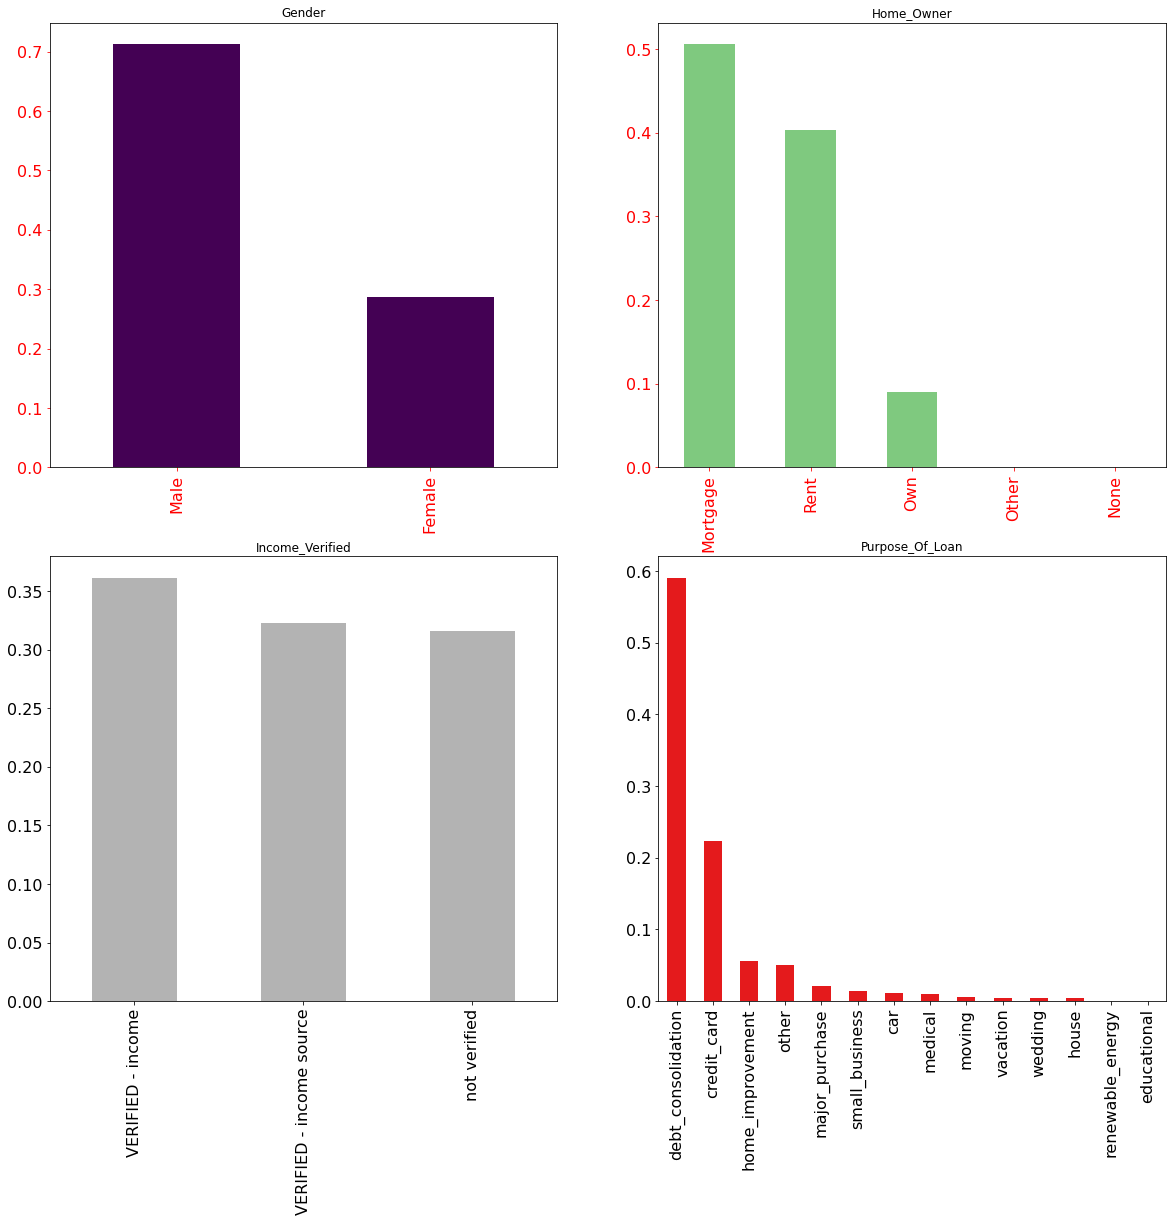

In [11]:
#Independent Variable (Categorical)
#'Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'
print(plt.figure(1) )
ax = plt.subplot(221) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Gender',colormap = 'viridis',fontsize = 16) 
ax = plt.subplot(222)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Home_Owner'].value_counts(normalize=True).plot.bar(title= 'Home_Owner',colormap = 'Accent',fontsize = 16) 
plt.subplot(223) 
train['Income_Verified'].value_counts(normalize=True).plot.bar(title= 'Income_Verified',colormap = 'Set2_r',fontsize = 16) 
plt.subplot(224) 
train['Purpose_Of_Loan'].value_counts(normalize=True).plot.bar(title= 'Purpose_Of_Loan',colormap = 'Set1',fontsize = 16) 
plt.show()
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')

In [12]:
## 'Loan_Amount_Requested','Length_Employed'
#Inquiries_Last_6Mo, Number_Open_Accounts,Total_Accounts               int64
#Independent Variable (Ordinal)
print(train['Length_Employed'].unique())
print(train['Inquiries_Last_6Mo'].unique())
print(train['Number_Open_Accounts'].unique())
print(train['Total_Accounts'].unique())

['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
[0 3 1 2 4 5 6 7 8]
[ 9 12 16 19 25  8 24  7  5 20 10 15  6 14 11 29  4 13 21  3 22 18 26 17
  2 27 23 31 32 33 35 28 36 30 34 44 37 39  1 40  0 38 62 42 43 41 49 47
 50 45 48 58 53 76 46 54 51 52]
[ 14  24  16  22  30  15  12  31   9  43  13  17  28  26  21  20  34  27
  10  44  25   8   7  19  41  18  11  65   6  29  23  37  32  45  38  36
  71  40  42  51  53  35  47  39  54  46  33  58  49  59  62   4  69  60
  52  56  48   5  63   3  50  55  61  57  64  76   2  75  67  66  70  77
  86  68  72  90  89  81  98  73 105  74  79  85  82  80  93  78  87  88
  91  84  83  94 156 102 116  97  92  99]


Figure(432x288)


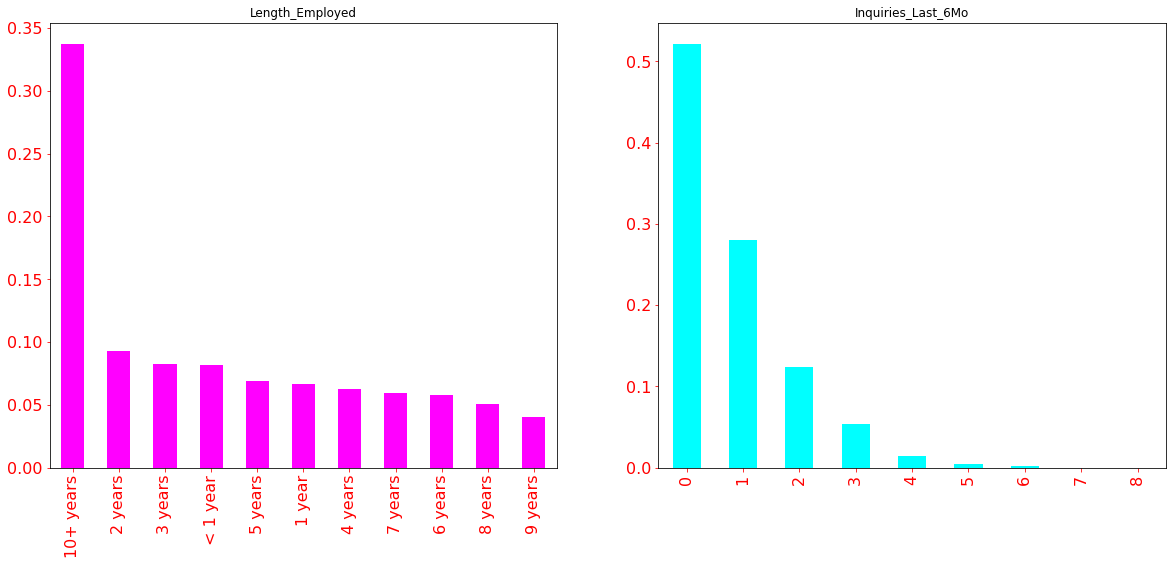

In [13]:
#Independent Variable (Ordinal)
#'Length_Employed', Inquiries_Last_6Mo
print(plt.figure(1) )
ax = plt.subplot(221) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Length_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Length_Employed',colormap = 'spring',fontsize = 16) 
ax = plt.subplot(222) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Inquiries_Last_6Mo'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Inquiries_Last_6Mo',colormap = 'cool',fontsize = 16) 


#Independent Variable (Numerical)
#Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.
#Loan_Amount_Requested,Annual_Income,Debt_To_Income,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts               


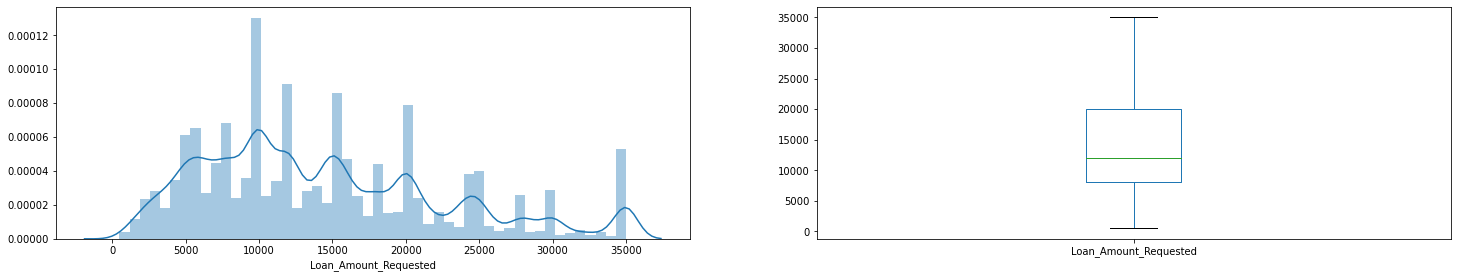

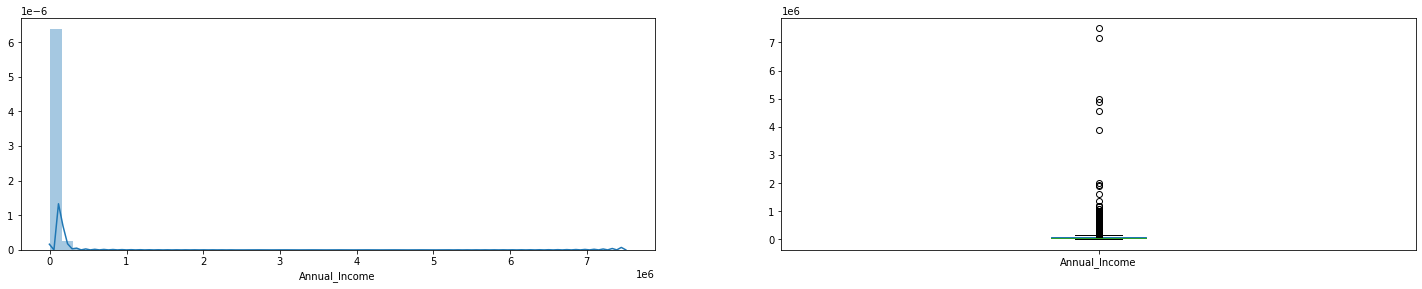

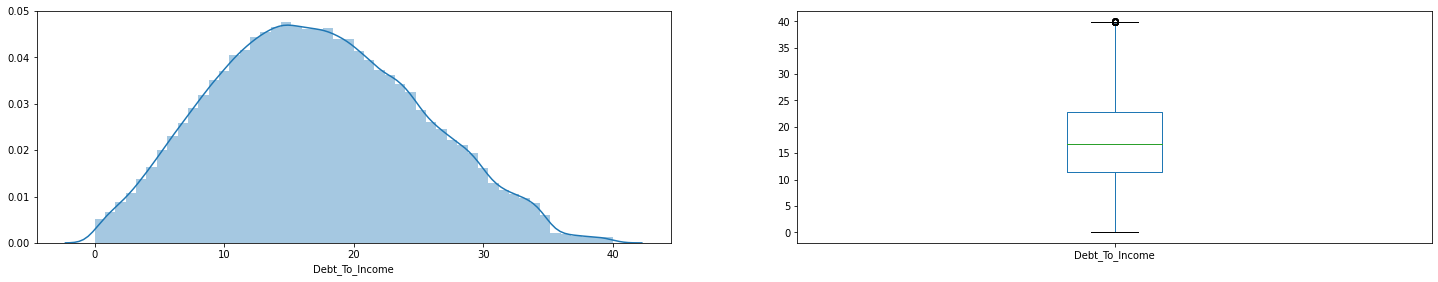

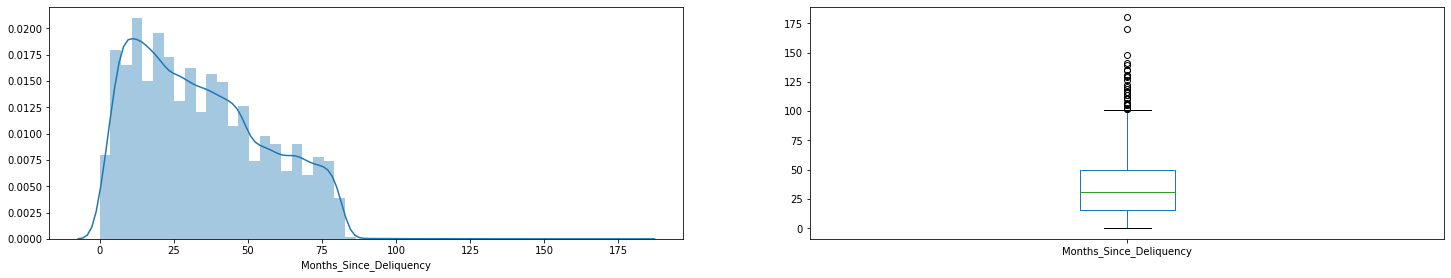

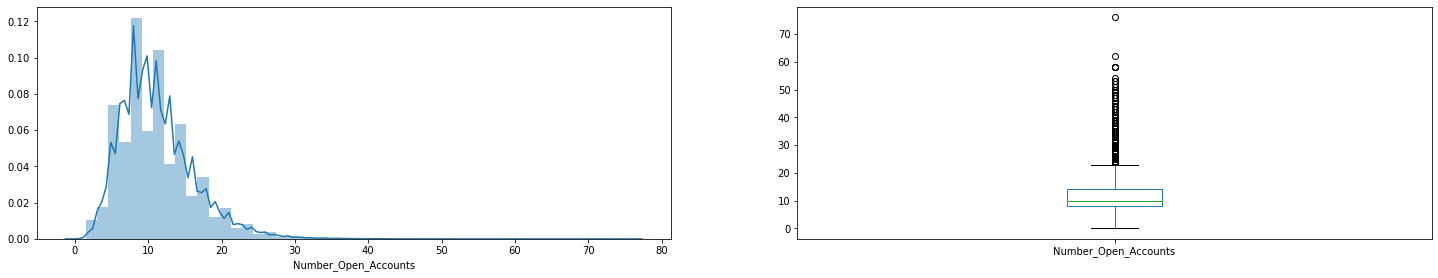

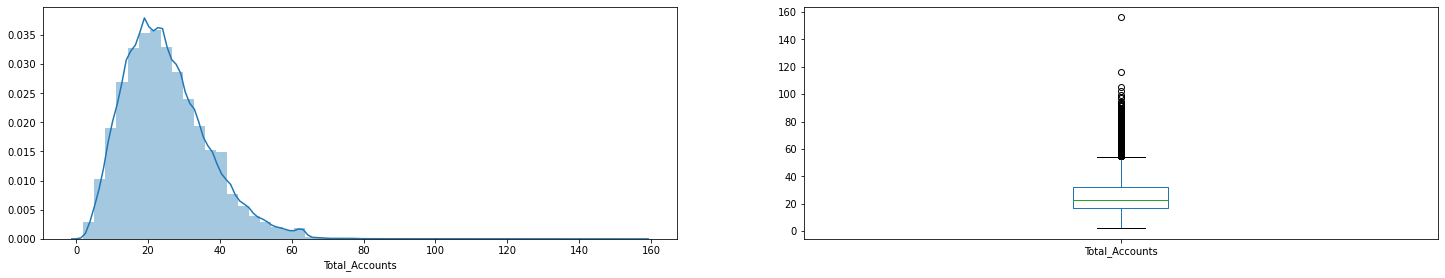

In [14]:

i = 1

for col in cont_col:
    plt.figure(figsize = (25,35))
    plt.subplot(7,2,i)
    sns.distplot(train[col]); 
    plt.subplot(7,2,i+1) 
    train[col].plot.box()
    i += 2
    plt.show()

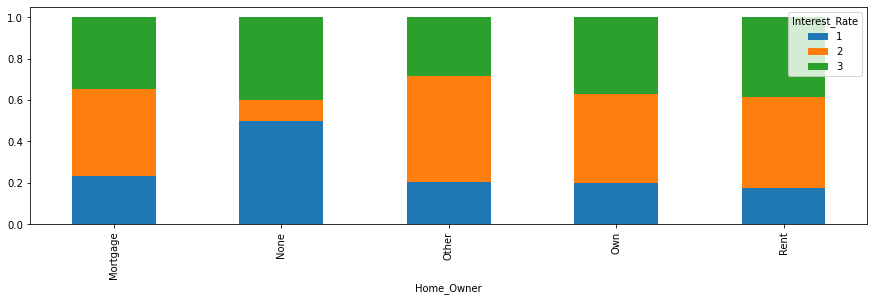

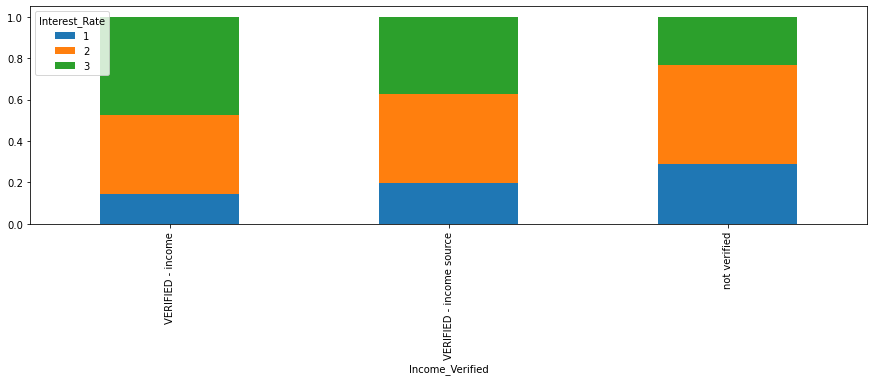

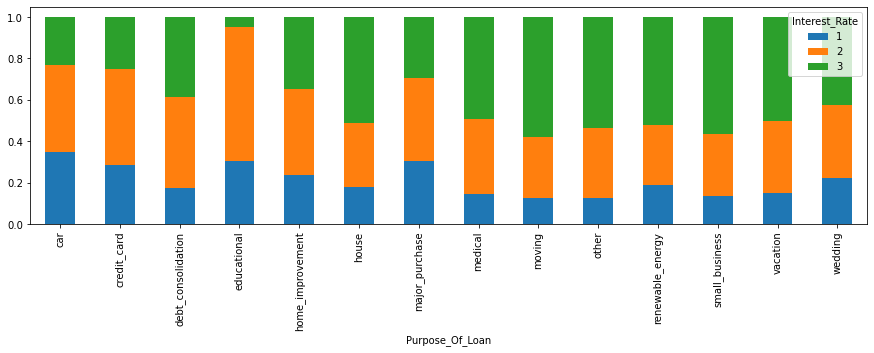

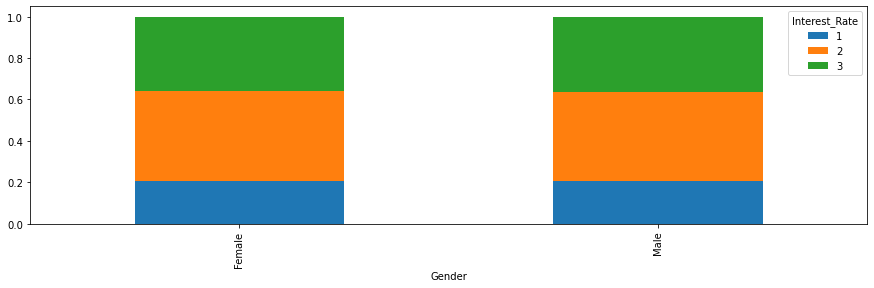

In [15]:
for col in nom_col:
    Gender=pd.crosstab(train[col],train['Interest_Rate']) 
    #print(Gender)
    Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))

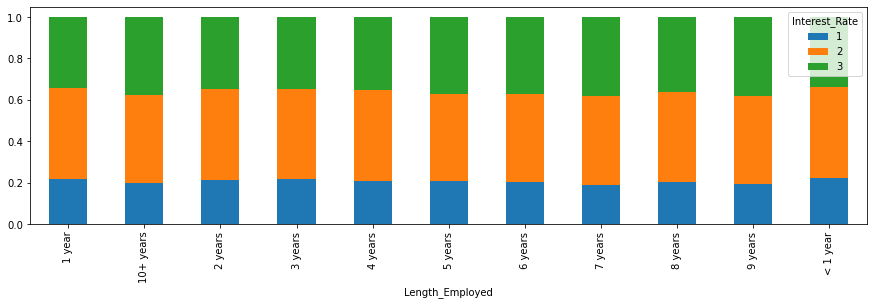

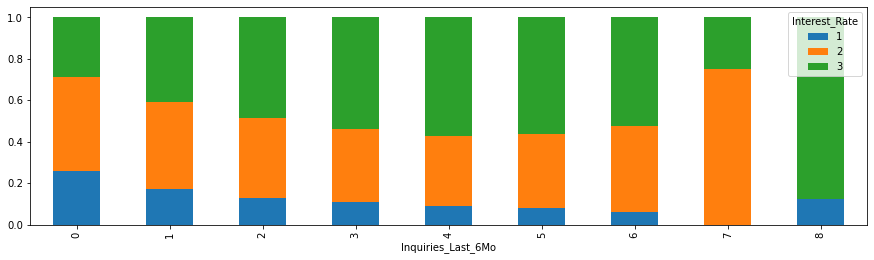

In [16]:
for col in ord_col:
    Gender=pd.crosstab(train[col],train['Interest_Rate']) 
    #print(Gender)
    Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))

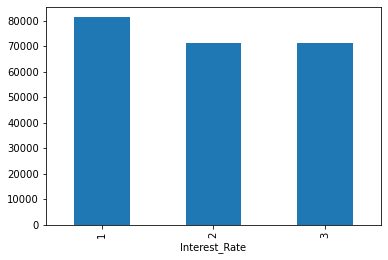

In [17]:
train.groupby('Interest_Rate')['Annual_Income'].mean().plot.bar()

In [18]:
print(train['Annual_Income'].max())
print(train['Annual_Income'].min())
print(train['Annual_Income'].mean())

7500000.0
4000.0
73331.15943386468


In [19]:
bins=[0,100000,500000,1000000,7600000] 
group=['Low','Average','High', 'Very high'] 
train['Annual_Income_bin']=pd.cut(train['Annual_Income'],bins,labels=group)

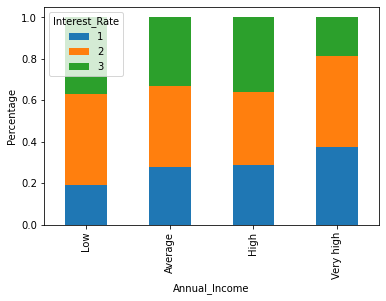

In [20]:
Annual_Income_bin=pd.crosstab(train['Annual_Income_bin'],train['Interest_Rate']) 
Annual_Income_bin.div(Annual_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Annual_Income') 
P = plt.ylabel('Percentage')

In [21]:
train.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.000000,164309.000000,139207.000000,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,10082155.000000,14349.336920,73331.159434,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,47432.067027,8281.868700,60377.498294,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,10000001.000000,500.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,10041078.000000,8000.000000,45000.000000,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,10082155.000000,12075.000000,63000.000000,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,10123232.000000,20000.000000,88697.500000,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,10164309.000000,35000.000000,7500000.000000,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


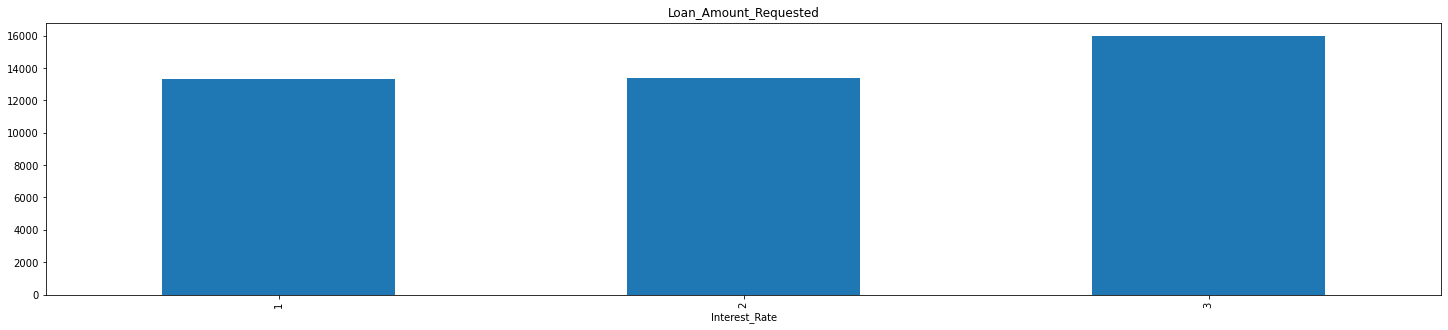

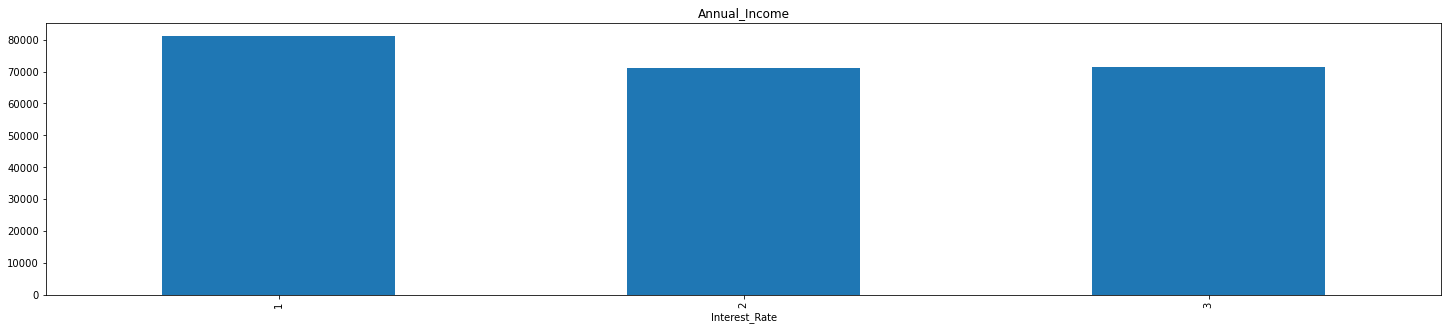

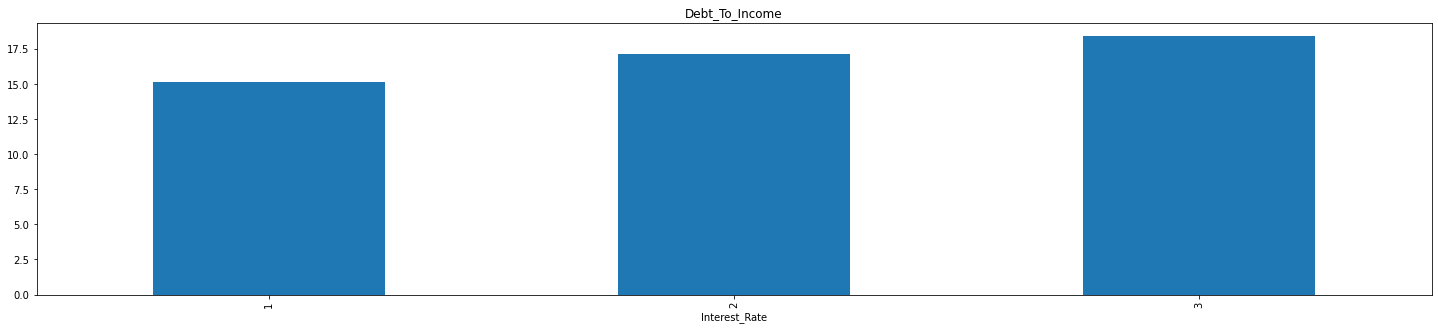

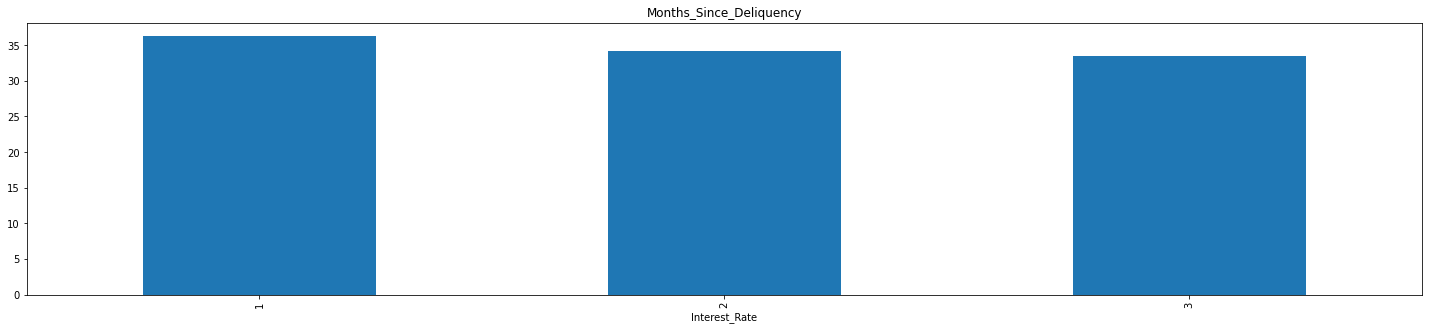

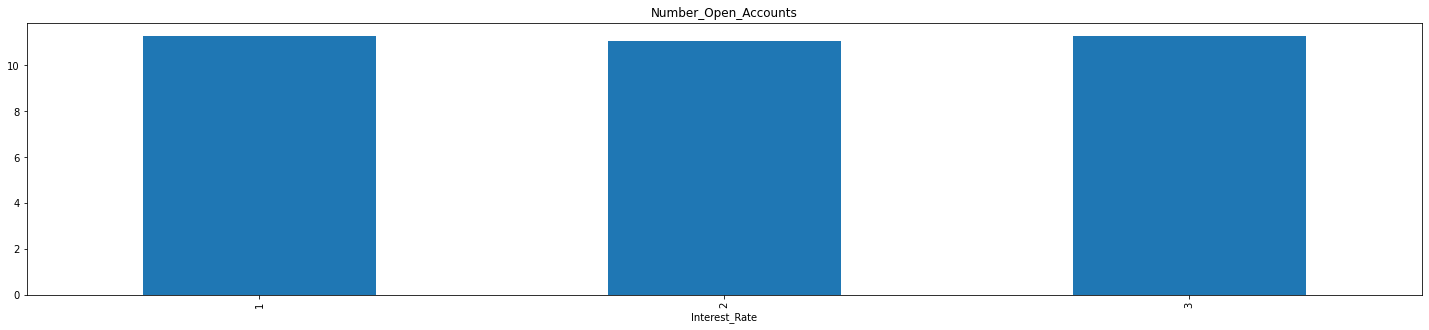

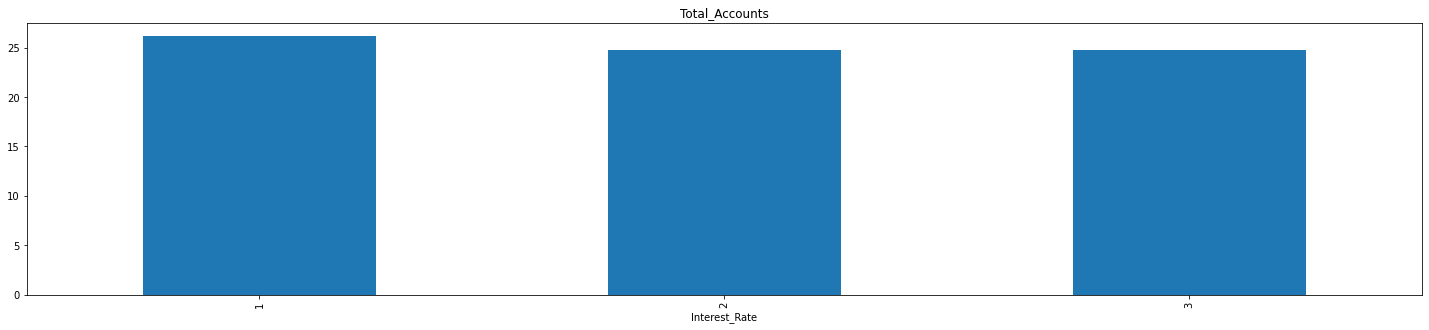

In [22]:
i = 1
for col in cont_col:
    plt.figure(figsize = (25,35))
    plt.subplot(len(cont_col),1,i)
    train.groupby('Interest_Rate')[col].mean().plot.bar(title = col)
    i += 1

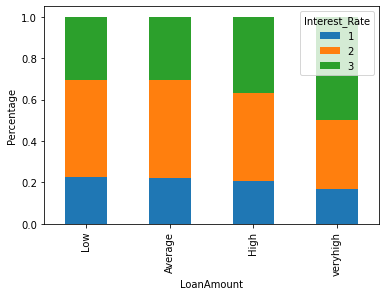

In [23]:
bins=[0,8000,12000,20000,36000] 
group=['Low','Average','High','veryhigh'] 
train['LoanAmount_bin']=pd.cut(train['Loan_Amount_Requested'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Interest_Rate']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [24]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Annual_Income_bin',
       'LoanAmount_bin'],
      dtype='object')

In [25]:
train['Length_Employed'].str.extract('(\d+)')


,0
0,1
1,4
2,7
3,1
4,8
...,...
164304,10
164305,8
164306,10
164307,4


In [26]:
#train=train.drop(['Annual_Income_bin', 'LoanAmount_bin'], axis=1)
train['Length_Employed'] = train['Length_Employed'].str.extract('(\d+)').astype('int64',errors='ignore')
test['Length_Employed'] = test['Length_Employed'].str.extract('(\d+)').astype('int64',errors='ignore')


In [27]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Annual_Income_bin,LoanAmount_bin
0,10000001,7000,1,Rent,68000.000000,not verified,car,18.370000,0,nan,9,14,Female,1,Low,Low
1,10000002,30000,4,Mortgage,nan,VERIFIED - income,debt_consolidation,14.930000,0,17.000000,12,24,Female,3,NaN,veryhigh
2,10000003,24725,7,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.880000,0,nan,12,16,Male,3,Low,veryhigh
3,10000004,16000,1,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.340000,3,nan,16,22,Male,3,Low,High
4,10000005,17000,8,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.170000,1,nan,19,30,Female,1,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,10,Rent,nan,VERIFIED - income source,credit_card,13.560000,0,nan,13,16,Male,2,NaN,veryhigh
164305,10164306,6000,8,Own,nan,VERIFIED - income source,small_business,9.120000,0,36.000000,13,30,Male,2,NaN,Low
164306,10164307,20250,10,Mortgage,nan,VERIFIED - income,credit_card,18.170000,1,nan,17,30,Male,1,NaN,veryhigh
164307,10164308,10000,4,Rent,nan,not verified,major_purchase,18.750000,1,48.000000,16,62,Female,3,NaN,Average


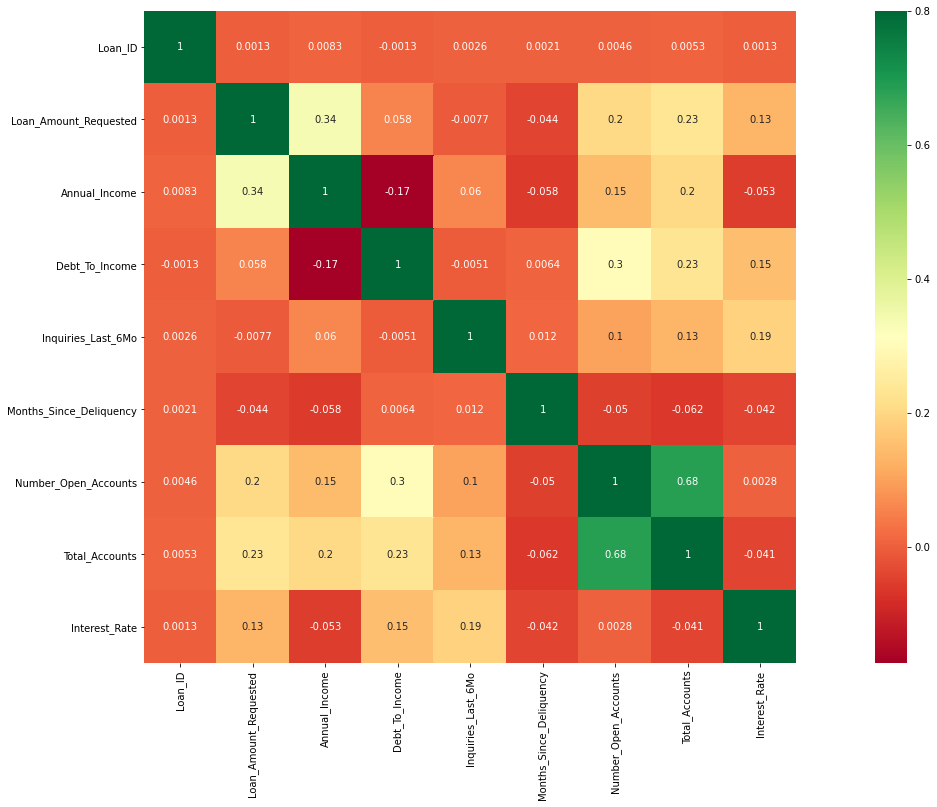

In [28]:
 
f, ax = plt.subplots(figsize=(28, 12)) 
sns.heatmap(train.corr(), vmax=.8, square=True, cmap="RdYlGn",annot = True);

## Handle Null Values

In [29]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
Annual_Income_bin          25102
LoanAmount_bin                 0
dtype: int64

In [30]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [31]:
train.drop('Months_Since_Deliquency',axis = 1,inplace = True)
test.drop('Months_Since_Deliquency',axis = 1,inplace = True)

In [32]:
train['Length_Employed'].value_counts()
train['Home_Owner'].value_counts()


Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [33]:
train['Length_Employed'].fillna(train['Length_Employed'].mode()[0],inplace = True)
train['Home_Owner'].fillna(train['Home_Owner'].mode()[0],inplace = True)

test['Length_Employed'].fillna(train['Length_Employed'].mode()[0],inplace = True)
test['Home_Owner'].fillna(train['Home_Owner'].mode()[0],inplace = True)

In [34]:
train['Annual_Income'].fillna(train['Annual_Income'].median(),inplace = True)
test['Annual_Income'].fillna(train['Annual_Income'].median(),inplace = True)

# Outliers

In [35]:
minvalue=min(train['Annual_Income'])
maxvalue=max(train['Annual_Income'])
meanvalue=np.mean(train['Annual_Income'])
medianvalue=np.median(train['Annual_Income'])

points=[minvalue, maxvalue, meanvalue, medianvalue]
names=["min","max","mean","mid"]

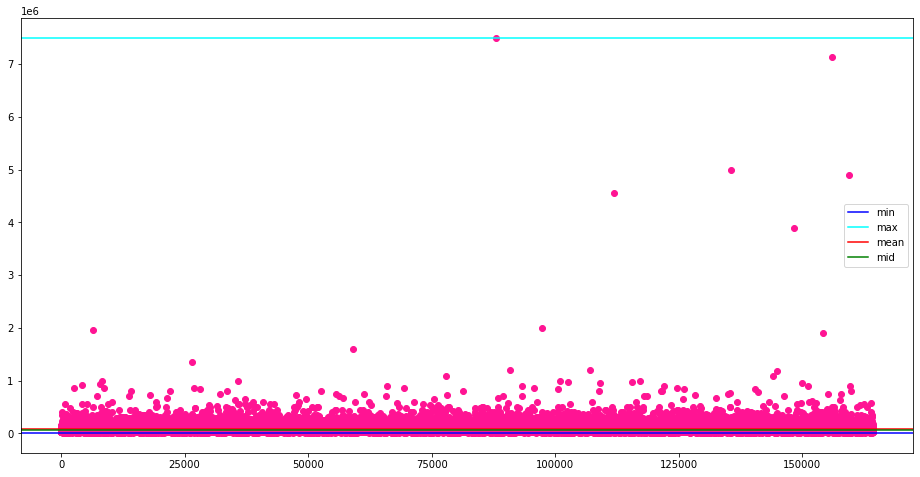

In [36]:
#Lets see scatter plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train.index,train['Annual_Income'],color = 'deeppink')
ax.axhline(y=minvalue, label="min",color='blue')
ax.axhline(y=maxvalue, label="max",color='cyan')
ax.axhline(y=meanvalue, label="mean",color='red')
ax.axhline(y=medianvalue, label="mid",color='green')
ax.legend()

You can see the outliers clearly

In [37]:
#Lets see Z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train['Annual_Income']))
print(z)

[0.06737783 0.15714705 0.06846814 ... 0.15714705 0.15714705 0.15714705]


In [38]:
threshold = 3
print(np.where(z > 3))

(array([    98,    177,    292, ..., 164066, 164101, 164112]),)


In [39]:
z[98]

5.893298454755342

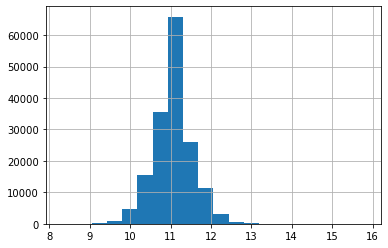

In [40]:
train['Annual_Income_log'] = np.log(train['Annual_Income']) 
train['Annual_Income_log'].hist(bins=20) 
test['Annual_Income_log'] = np.log(test['Annual_Income'])

In [41]:
train[['Annual_Income','Annual_Income_log']].sort_values('Annual_Income')

,Annual_Income,Annual_Income_log
29808,4000.000000,8.294050
137615,4000.000000,8.294050
113045,4200.000000,8.342840
151827,4800.000000,8.476371
32343,4800.000000,8.476371
...,...,...
111833,4560077.000000,15.332850
159569,4900000.000000,15.404746
135686,5000000.000000,15.424948
156075,7141778.000000,15.781472


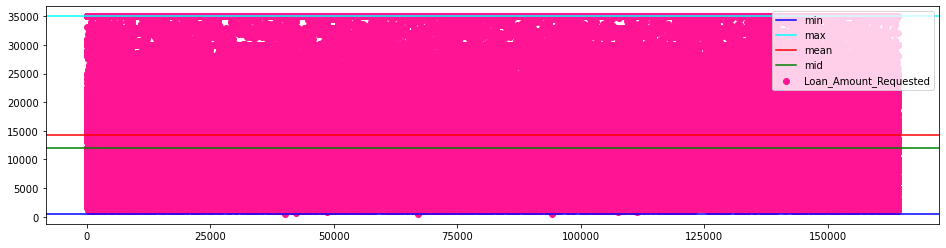

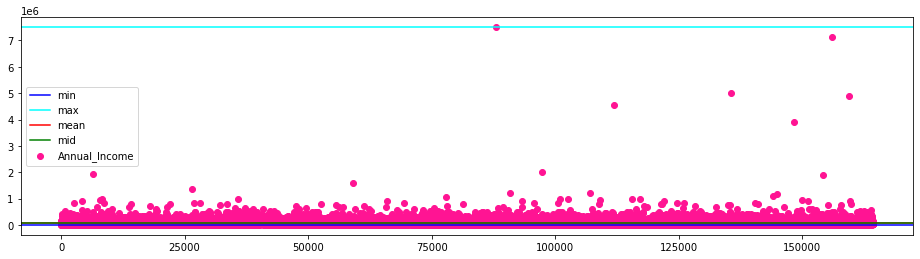

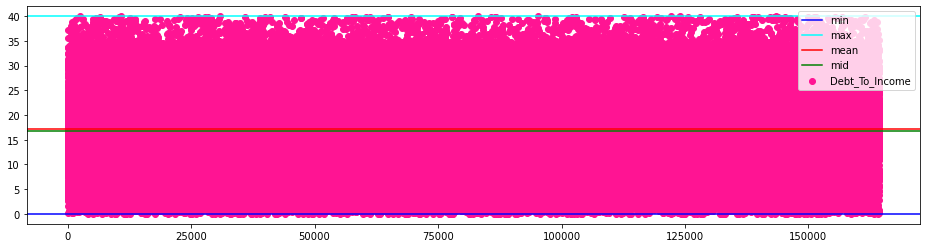

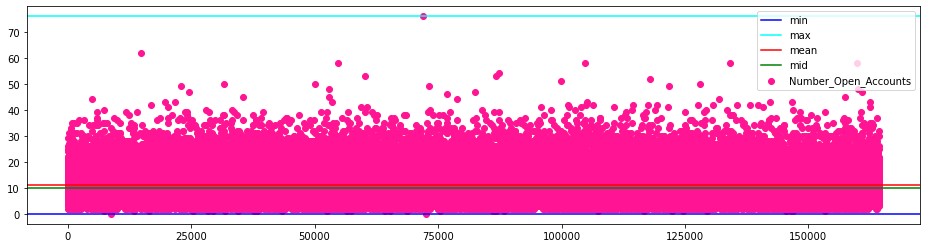

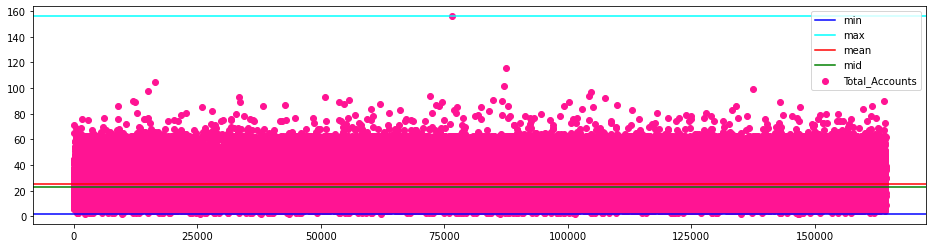

In [42]:
#Lets see scatter plot
cont_col.remove('Months_Since_Deliquency')
for col in cont_col:
    minvalue=min(train[col])
    maxvalue=max(train[col])
    meanvalue=np.mean(train[col])
    medianvalue=np.median(train[col])

    #points=[minvalue, maxvalue, meanvalue, medianvalue]
    #names=["min","max","mean","mid"]
    fig, ax = plt.subplots(figsize=(16,4))
    ax.scatter(train.index,train[col],color = 'deeppink',label = col)
    ax.axhline(y=minvalue, label="min",color='blue')
    ax.axhline(y=maxvalue, label="max",color='cyan')
    ax.axhline(y=meanvalue, label="mean",color='red')
    ax.axhline(y=medianvalue, label="mid",color='green')
    ax.legend()

In [43]:
threshold = 3
for col in cont_col:
    z = np.abs(stats.zscore(train[col]))
    outlier = np.where(z > threshold)
    print("No. of outliers in ",col,":",len(outlier[0]))
    print(outlier[0])
    print()

#type(outlier[0])

No. of outliers in  Loan_Amount_Requested : 0
[]

No. of outliers in  Annual_Income : 1465
[    98    177    292 ... 164066 164101 164112]

No. of outliers in  Debt_To_Income : 0
[]

No. of outliers in  Number_Open_Accounts : 1671
[    31    233    270 ... 163922 164174 164235]

No. of outliers in  Total_Accounts : 1576
[    47    117    339 ... 164235 164260 164307]



In [44]:
train['Annual_Income'][177]

350000.0

In [45]:
#Annual Income outliered values
train[(np.abs(stats.zscore(train['Annual_Income'])) > 3)]['Annual_Income'].sort_values()

64435     239000.000000
154441    239000.000000
57369     240000.000000
69920     240000.000000
69967     240000.000000
              ...      
111833   4560077.000000
159569   4900000.000000
135686   5000000.000000
156075   7141778.000000
88088    7500000.000000
Name: Annual_Income, Length: 1465, dtype: float64

In [46]:
#Annual Income outliered values
train[(np.abs(stats.zscore(train['Number_Open_Accounts'])) > 3)]['Number_Open_Accounts'].sort_values()

136079    27
122440    27
78488     27
78550     27
30841     27
          ..
104667    58
134036    58
54698     58
14930     62
72015     76
Name: Number_Open_Accounts, Length: 1671, dtype: int64

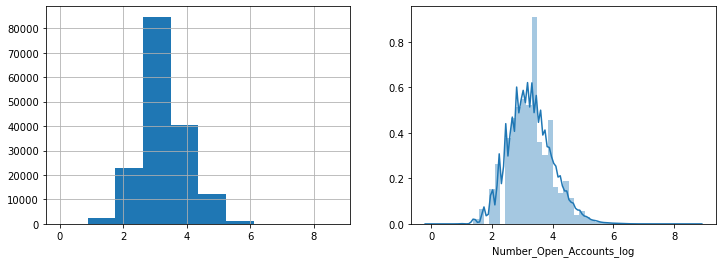

In [47]:
#As we have 0's in the sample, if we apply log those will be -inf, to overcome this we apply sqrt instead of log
train['Number_Open_Accounts_log'] = np.sqrt(train['Number_Open_Accounts'])
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Number_Open_Accounts_log'].hist() 
plt.subplot(1,2,2)
sns.distplot(train['Number_Open_Accounts_log'])
test['Number_Open_Accounts_log'] = np.sqrt(test['Number_Open_Accounts'])

In [48]:
train[['Number_Open_Accounts_log','Number_Open_Accounts']].sort_values('Number_Open_Accounts_log')

,Number_Open_Accounts_log,Number_Open_Accounts
8867,0.000000,0
72538,0.000000,0
13497,1.000000,1
57321,1.000000,1
31964,1.000000,1
...,...,...
159794,7.615773,58
54698,7.615773,58
134036,7.615773,58
14930,7.874008,62


In [49]:
train[(np.abs(stats.zscore(train['Total_Accounts'])) > 3)]['Total_Accounts'].sort_values()

123623     60
40119      60
39620      60
18191      60
18531      60
         ... 
137376     99
86968     102
16509     105
87447     116
76601     156
Name: Total_Accounts, Length: 1576, dtype: int64

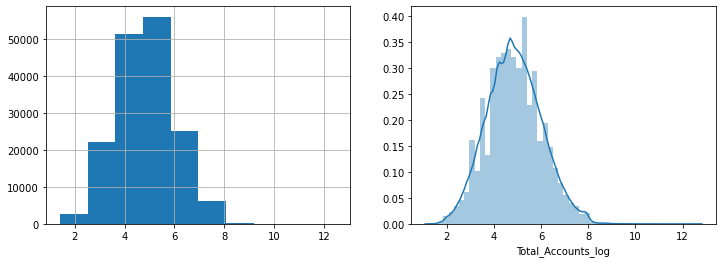

In [50]:
#As we have 0's in the sample, if we apply log those will be -inf, to overcome this we apply sqrt instead of log
train['Total_Accounts_log'] = np.sqrt(train['Total_Accounts'])
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Total_Accounts_log'].hist() 
plt.subplot(1,2,2)
sns.distplot(train['Total_Accounts_log'])
test['Total_Accounts_log'] = np.sqrt(test['Number_Open_Accounts'])

In [51]:
train[['Total_Accounts_log','Total_Accounts']].sort_values('Total_Accounts_log')

,Total_Accounts_log,Total_Accounts
2248,1.414214,2
101452,1.414214,2
62138,1.414214,2
86244,1.414214,2
146771,1.414214,2
...,...,...
137376,9.949874,99
86968,10.099505,102
16509,10.246951,105
87447,10.770330,116


In [52]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Annual_Income_bin', 'LoanAmount_bin',
       'Annual_Income_log', 'Number_Open_Accounts_log', 'Total_Accounts_log'],
      dtype='object')

## Model Building
Support Vector Machine (SVM)
k-Nearest Neighbors (KNN)
Bagged Decision Trees (BAG)
Random Forest (RF)
Extra Trees (ET)

In [53]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [54]:
test

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Annual_Income_log,Number_Open_Accounts_log,Total_Accounts_log
0,27500,10,Mortgage,129000.000000,VERIFIED - income,debt_consolidation,12.870000,0,10,37,Male,11.767568,3.162278,3.162278
1,26000,10,Mortgage,110000.000000,not verified,credit_card,11.370000,0,6,23,Male,11.608236,2.449490,2.449490
2,6075,1,Rent,75000.000000,VERIFIED - income,debt_consolidation,6.830000,2,5,20,Male,11.225243,2.236068,2.236068
3,12000,10,Mortgage,73000.000000,VERIFIED - income source,debt_consolidation,7.760000,0,6,8,Male,11.198215,2.449490,2.449490
4,35000,1,Mortgage,156000.000000,not verified,debt_consolidation,9.620000,0,9,21,Male,11.957611,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,15000,9,Mortgage,120000.000000,VERIFIED - income,other,8.150000,2,13,57,Male,11.695247,3.605551,3.605551
109537,9600,10,Mortgage,125000.000000,not verified,credit_card,9.080000,1,9,34,Male,11.736069,3.000000,3.000000
109538,2000,5,Rent,37850.000000,not verified,credit_card,11.600000,0,10,11,Male,10.541386,3.162278,3.162278
109539,2125,6,Rent,30000.000000,not verified,other,24.880000,0,5,6,Male,10.308953,2.236068,2.236068


In [55]:
X = train.drop(['Interest_Rate','Total_Accounts','Number_Open_Accounts','Annual_Income','Annual_Income_bin','LoanAmount_bin'],1) 
y = train['Interest_Rate']
test = test.drop(['Total_Accounts','Number_Open_Accounts','Annual_Income'],1)

In [56]:
X.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Gender', 'Annual_Income_log',
       'Number_Open_Accounts_log', 'Total_Accounts_log'],
      dtype='object')

In [57]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [59]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
pred_cv = knn.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.459821881403039

In [61]:
# accuracy on X_test 

accuracy = knn.score(x_cv, y_cv) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_cv)  
cm = confusion_matrix(y_cv, knn_predictions)

0.459821881403039


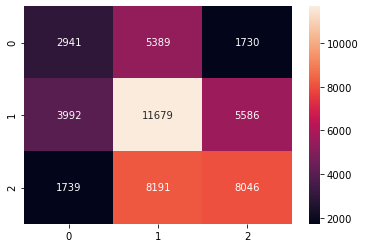

In [62]:
sns.heatmap(cm,annot=True,fmt = '')

In [63]:
pred_test = knn.predict(test)

In [64]:
submission=pd.read_csv("../input/janata-hack-machine-learning-for-banking/sample_submission_HSqiq1Q.csv")
submission['Interest_Rate']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('knn.csv',index = False)
submission.head()

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,2
2,10164312,2
3,10164313,3
4,10164314,3


In [65]:
submission.to_csv('knn.csv',index = False)

In [66]:
from sklearn.model_selection import StratifiedKFold

In [67]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

    rf_test = model.predict(test)


1 of kfold 5
accuracy_score 0.5099202726553466

2 of kfold 5
accuracy_score 0.5171018197309963

3 of kfold 5
accuracy_score 0.513389325056296

4 of kfold 5
accuracy_score 0.5168279471730266

5 of kfold 5
accuracy_score 0.510696570402605


In [68]:
submission['Interest_Rate']=rf_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('rf1.csv',index = False)

In [69]:
rf = RandomForestClassifier(max_depth=10).fit(x_train, y_train) 
pred_cv = rf.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.5152455723936462

In [70]:
pred_test = rf.predict(test)

In [71]:
submission['Interest_Rate']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('rf1.csv',index = False)

In [72]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [73]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [74]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=181, random_state=1)

In [75]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=181)    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    #pred2=model.predict_proba(test)[:,1]
    


1 of kfold 5
accuracy_score 0.5168888077414643

2 of kfold 5
accuracy_score 0.5227314223114844

3 of kfold 5
accuracy_score 0.5205708721319457

4 of kfold 5
accuracy_score 0.5214533503742925

5 of kfold 5
accuracy_score 0.5152308207297405
